In [1]:
from FISHscale.utils.dataset import Dataset
from skimage import img_as_bool
from skimage.transform import rescale
import numpy as np
import matplotlib
from skimage import util
import zarr
%load_ext autoreload
%autoreload 2

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/home/alej

In [2]:
cluster_colors_GBM = {
    'AC-like':'#2ecc71',#inchworm B4FF9F
    'GBL-like':'#c2f970',#'#c2f970'
    'preOPC-like':'#7befb2',#'#c2f970'
    'AC-like Prolif':'#c2f970',
    'GW-like hypoxia independent':'#e76d89',# Deep cerise
    'GW-like hypoxia/MHC':'#e76d89',# Deep cerise
    'GW-like':'#e76d89',# Deep cerise
    'nIPC-like':'#ff9470', #atomic tangerine
    'RG-like':'#f62459',  #radical red
    'OPC-like':'#89c4f4', #bright turquoise
    
}


In [3]:
DS = Dataset('/wsfish/glioblastoma/EEL/Phase1/Analysis/JJEXP20220505_EEL_SL046C_S2/JJEXP20220505_EEL_SL046C_S2_RNA_transformed_assigned.parquet',
             gene_label='decoded_genes',
             pixel_size='.27 micrometers',
             reparse=True,
            )


100%|██████████████████████████████████████████████████████████████████████████| 1324/1324 [00:16<00:00, 78.59it/s]


    Loaded: JJEXP20220505_EEL_SL046C_S2_RNA_transformed_assigned


In [4]:
DS.color_dict['EGFR'] = matplotlib.colors.to_rgb(cluster_colors_GBM['preOPC-like'])
DS.color_dict['GFAP'] = matplotlib.colors.to_rgb('#93faa5')
DS.color_dict['COL1A1'] = matplotlib.colors.to_rgb('#93faa5')

DS.color_dict['FN1'] = matplotlib.colors.to_rgb('#d5b8ff')
DS.color_dict['TNC'] = matplotlib.colors.to_rgb('#fffc7f') #matplotlib.colors.to_rgb('#e33d94')
DS.color_dict['VEGFA'] = matplotlib.colors.to_rgb(cluster_colors_GBM['GW-like'])
DS.color_dict['CLU'] = matplotlib.colors.to_rgb(cluster_colors_GBM['preOPC-like'])
DS.color_dict['CD44'] = matplotlib.colors.to_rgb(cluster_colors_GBM['preOPC-like'])
DS.color_dict['GAP43'] = matplotlib.colors.to_rgb('#038aff')

DS.color_dict['FTL'] = matplotlib.colors.to_rgb('#FFFC7B')
DS.color_dict['SPP1'] = matplotlib.colors.to_rgb('#FACB33')
DS.color_dict['CD74'] = matplotlib.colors.to_rgb('#2B6BBD')


In [5]:
img = zarr.load('/datc/sl/fish_rawdata/JJEXP20220505_EEL_SL046C_S2/fresh_tissue/segmentation/image_segmented_labels.zarr/segmented_labels_image/')
#img = np.flip(img, axis=0)
img[img >0] = 1

#x1, y1, x2, y2 = x1*0.27, y1*0.27, x2*0.27, y2*0.27

In [6]:
img_d = rescale(img, 0.27, anti_aliasing=False)
img_d[img_d >0] = 1
img_d = img_as_bool(img_d)
#img_d = np.flip(img_d, axis=0)

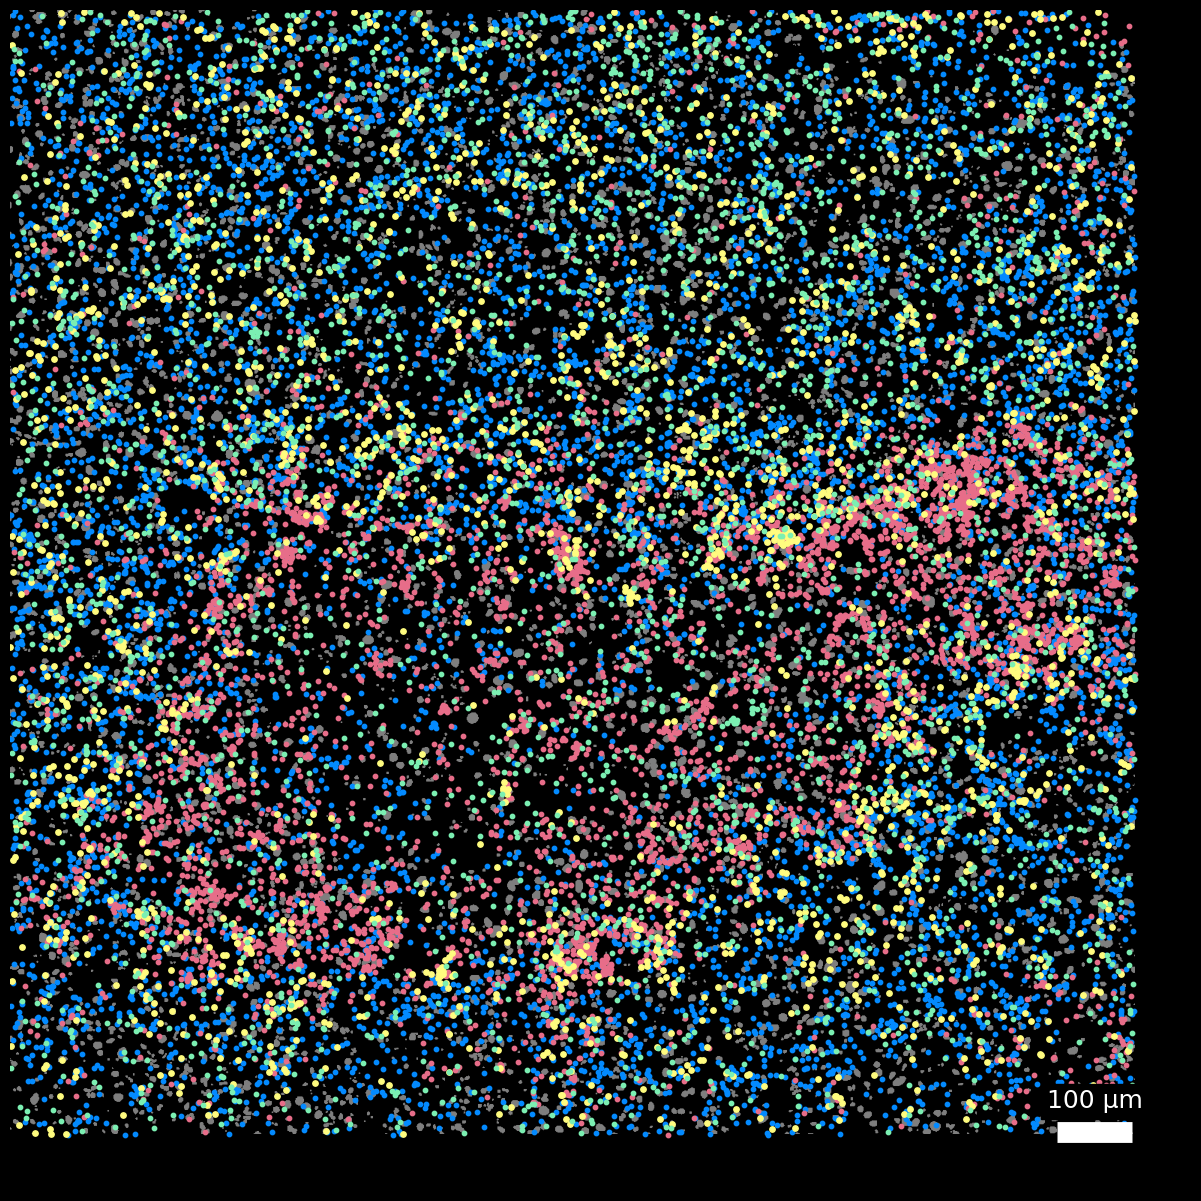

In [7]:
xlim = (7500,9000)
ylim=(2000,3500)

v =  [[xlim[0], ylim[0]],[xlim[1],ylim[1]]]

scale_factor = 1#0.27*4.5
img_zoom = img_d[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]

sizes = [10, 10, 15,10] 
genes = ['GAP43','VEGFA', 'TNC','CD44']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=200,
    show_axes=False,
    show_legend=False,
    view = v,
    image=img_zoom,
    reset_xy=True,
    save=True,
    save_name='figures/SL046C_dots.svg'
)